In [6]:
import os
# Set environment variables to disable multithreading as users will probably
# want to set the number of cores to the max of their computer.
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
###############################################################################
# Set TensorFlow print of log information
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [7]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from anomaly.constants import scores_description
from anomaly.utils import specobjid_to_idx
from autoencoders.ae import AutoEncoder
from sdss.metadata import MetaData


meta = MetaData()
%matplotlib inline

## Files and directories

In [8]:
bin_id = "bin_04"
model_id = "0013"
architecture = "256_128_64/latent_12"

meta_data_directory = "/home/edgar/spectra/0_01_z_0_5_4_0_snr_inf"
scores_directory = f"{meta_data_directory}/{bin_id}/explanation/{architecture}"
model_directory = f"{meta_data_directory}/{bin_id}/models/{architecture}"

In [9]:
wave = np.load(f"{meta_data_directory}/wave.npy")
spectra = np.load(f"{meta_data_directory}/spectra.npy", mmap_mode="r")
ids = np.load(f"{meta_data_directory}/ids_inputting.npy")

model = AutoEncoder(
    reload=True,
    reload_from=f"{model_directory}/{model_id}"
)

In [10]:
# Load data frames with anomalies per score
scores_df = {}

for metric in scores_description.keys():
    
    scores_df[metric] = pd.read_csv(
        f"{scores_directory}/{metric}/top_anomalies.csv.gz",
        index_col="specobjid",
    )

### retrieve sdss image of galaxy

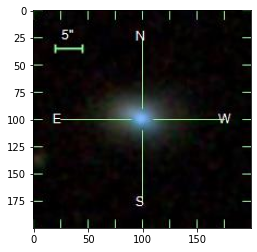

In [12]:
rank = 100
score_name = "mse_noRel100"
specobjid = scores_df[score_name].index[-rank]
ra = scores_df[score_name].loc[specobjid, "ra"]
dec = scores_df[score_name].loc[specobjid, "dec"]
save_to = "/home/edgar/Downloads/"
image_format = "pdf"

meta.get_sdss_image(specobjid, (ra, dec), save_to, image_format)
galaxy_sdss_image = plt.imread(f"{save_to}/{specobjid}.{image_format}")
plt.imshow(galaxy_sdss_image)

(-0.5, 199.5, 199.5, -0.5)

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


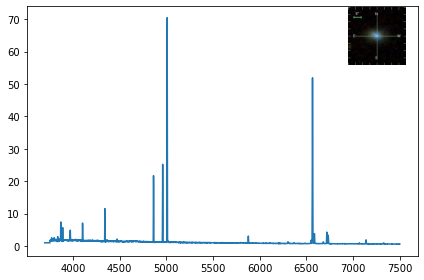

In [13]:
# Embbed image in a plot of the spectrum
read_from = "/home/edgar/Downloads/"
galaxy_image = plt.imread(f"{read_from}/{specobjid}.pdf")

idx = specobjid_to_idx(specobjid, ids)

fig, ax = plt.subplots(tight_layout=True)
ax.clear()

ax.plot(wave, spectra[idx])
image_axis = fig.add_axes([0.78, 0.76, 0.2, 0.2])
image_axis.imshow(galaxy_image)
image_axis.axis("off")
# fig.add_axes?
